In [348]:
#Import the library
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [349]:
train = pd.read_csv("C:\\Users\\USER\\Desktop\\DS\\titanic\\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [350]:
test = pd.read_csv("C:\\Users\\USER\\Desktop\\DS\\titanic\\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [351]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [352]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [353]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Dealing with Missing Values

In [354]:
#function to print the total percentage of the missing values
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [355]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [356]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


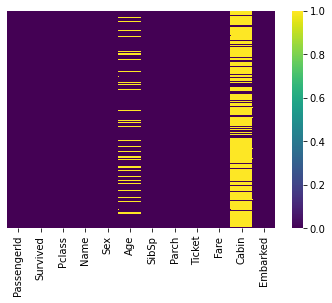

In [357]:
sns.heatmap(train.isnull(),cmap='viridis', yticklabels=False)
#more then 75% of missing values  found in both train and test is cabin. way is to drop the column or need advnced analysis

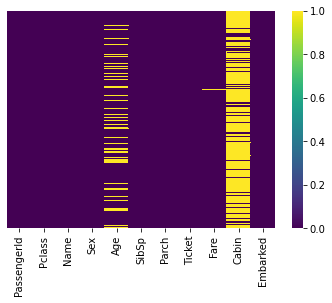

In [358]:
sns.heatmap(test.isnull(),cmap='viridis',yticklabels=False)

### Working with missing values - Train Data

In [359]:
#Drop cabin
train = train.drop(labels="Cabin", axis=1)

In [360]:
def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    
    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [361]:
#Embarked
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [362]:
train['Embarked'].mode()

0    S
dtype: object

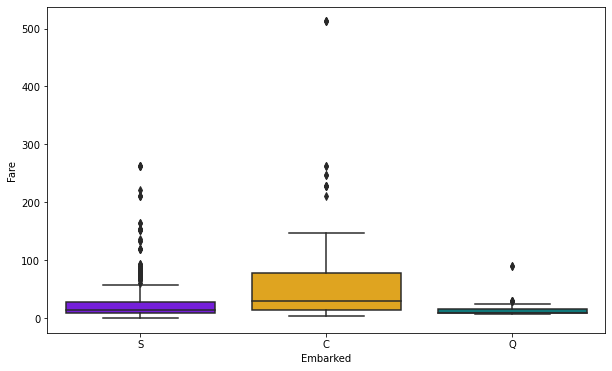

In [363]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Embarked', y='Fare', data=train, palette='prism_r')

#With respect to fare distribution C Embark shows mostly around 80.0 So lets fill it with C

In [364]:
train["Embarked"] = train["Embarked"].fillna("C")

In [365]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,170,19.08
Q,77,8.64


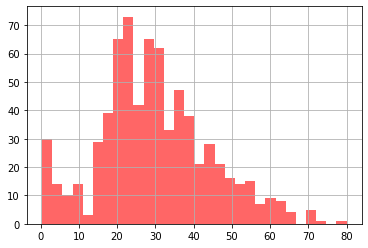

In [366]:
#Age
train['Age'].hist(bins=30, color='red', alpha=0.6)

In [367]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [368]:
corr = numeric_features.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [369]:
print(corr['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


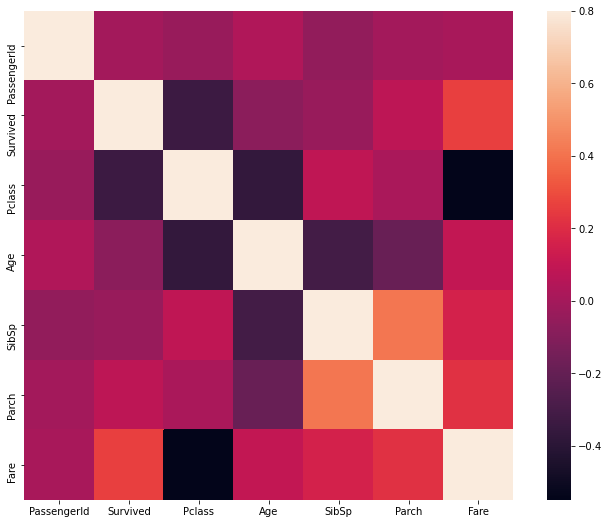

In [370]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [371]:
#Creating mean of age based on Pclass
class_1 = train[train['Pclass']==1]['Age'].mean()
class_2 = train[train['Pclass']==2]['Age'].mean()
class_3 = train[train['Pclass']==3]['Age'].mean()

In [372]:
train.loc[(train['Age'].isnull()) & (train['Pclass']==1), 'Age']=class_1
train.loc[(train['Age'].isnull()) & (train['Pclass']==2), 'Age']=class_2
train.loc[(train['Age'].isnull()) & (train['Pclass']==3), 'Age']=class_3

In [373]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Working with missing values - Test Data

In [374]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [375]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [376]:
#Drop Cabin
test = test.drop(labels="Cabin", axis=1)

In [377]:
#Fare
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [378]:
# We can go with average Fare with respect to class
meanFare_test = test.groupby('Pclass').mean()['Fare']
meanFare_test

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [379]:
test['Fare'] = test['Fare'].fillna(meanFare_test[3])

In [380]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


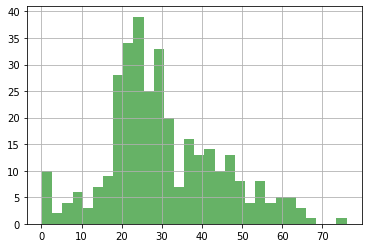

In [381]:
#Age
test['Age'].hist(bins=30,color='green',alpha=0.6)

In [382]:
class_1_test = test[test['Pclass']==1]['Age'].mean()
class_2_test = test[test['Pclass']==2]['Age'].mean()
class_3_test = test[test['Pclass']==3]['Age'].mean()

In [383]:
test.loc[(test['Age'].isnull()) & (test['Pclass']==1), 'Age']=class_1_test
test.loc[(test['Age'].isnull()) & (test['Pclass']==2), 'Age']=class_2_test
test.loc[(test['Age'].isnull()) & (test['Pclass']==3), 'Age']=class_3_test

In [384]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### Encoding Categorical Values

In [385]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [386]:
train.drop(['Name'],axis=1,inplace=True)

In [402]:
df_Pclass = pd.get_dummies(train['Pclass'])
df_Embarked = pd.get_dummies(train['Embarked'])
df_Sex = pd.get_dummies(train['Sex'])

train_final = pd.concat([train, df_Pclass, df_Embarked, df_Sex], axis=1)

In [403]:
train_final.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1,2,3,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,0,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,0,0,0,0,1,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1,0,1


In [410]:
train_final.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [411]:
train_final.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,C,Q,S,female,male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [393]:
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [448]:
df_Pclass = pd.get_dummies(test['Pclass'])
df_Embarked = pd.get_dummies(test['Embarked'])
df_Sex = pd.get_dummies(test['Sex'])


test_final = pd.concat([test, df_Pclass, df_Embarked, df_Sex], axis=1)

In [449]:
test_final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S,female,male
0,892,3,male,34.5,0,0,7.8292,Q,0,0,1,0,1,0,0,1
1,893,3,female,47.0,1,0,7.0000,S,0,0,1,0,0,1,1,0
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,0,1,0,0,1
3,895,3,male,27.0,0,0,8.6625,S,0,0,1,0,0,1,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1,0,0,1,1,0


In [450]:
test_final.drop(['PassengerId','Pclass','Sex','Embarked'],axis=1,inplace=True)

In [452]:
test_final.head()

,Age,SibSp,Parch,Fare,1,2,3,C,Q,S,female,male
0,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,1,0


In [416]:
train_final.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,C,Q,S,female,male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


### Modelling

In [426]:
X = train_final.iloc[:,1:].values
y = train_final.iloc[:,0].values




In [428]:
X

array([[22.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [25.14061972,  1.        ,  2.        , ...,  1.        ,
         1.        ,  0.        ],
       [26.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [32.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [427]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [429]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [436]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\USER\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [437]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [438]:
# Accuracy
from sklearn.metrics import accuracy_score
result = classifier.score(X_test, y_test)
result

0.7988826815642458

In [439]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[89, 11],
       [25, 54]], dtype=int64)

In [440]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [444]:
# Accuracy
from sklearn.metrics import accuracy_score
result1 = clf.score(X_test, y_test)
result1

0.8212290502793296

In [445]:
y_pred = clf.predict(X_test)

In [446]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_clf = confusion_matrix(y_test, y_pred)
cm_clf

array([[88, 12],
       [20, 59]], dtype=int64)

In [447]:
(88+59) / (88+12+20+59)
#correct pred by total number of inputs

0.8212290502793296

In [453]:
X_submission = test_final.values

In [455]:
y_submission = clf.predict(X_submission)
y_submission

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,